In [10]:
import matplotlib.pyplot as plt
import numpy as np

# --- Helper Functions
def translate(points, tx, ty):
    """Translation of points by tx, ty"""
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return (T @ points.T).T

def scale(points, sx, sy):
    """Scaling of points by sx, sy"""
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0, 0, 1]])
    return (S @ points.T).T

def rotate(points, angle):
    """Rotation of points by given angle (in degrees)"""
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad), np.cos(rad), 0],
                  [0, 0, 1]])
    return (R @ points.T).T

# --- Task 4 Extra: Shear Matrix Implementation
def shear_x(points, shx):
    """Shearing of points along x-axis by shx"""
    SHx = np.array([[1, shx, 0],
                    [0, 1, 0],
                    [0, 0, 1]])
    return (SHx @ points.T).T

Original triangle vertices (homogeneous coordinates):
[[0.  0.  1. ]
 [1.  0.  1. ]
 [0.5 1.  1. ]
 [0.  0.  1. ]]

New vertices after 45 degree rotation:
[[ 0.     0.     1.   ]
 [ 0.707  0.707  1.   ]
 [-0.354  1.061  1.   ]
 [ 0.     0.     1.   ]]


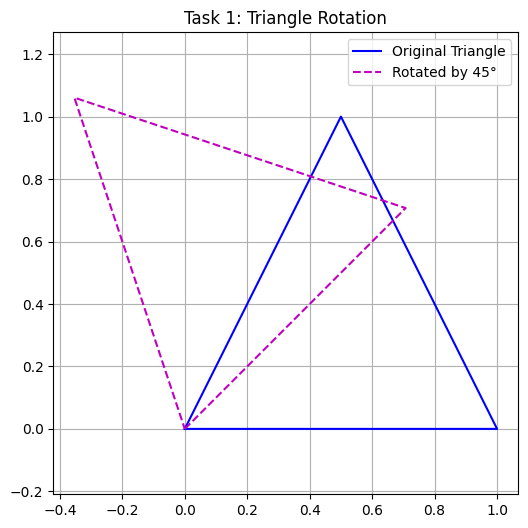

In [11]:
# --- Task 1: Single Transform - Rotate a triangle by 45 degrees
triangle = np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0.5, 1, 1],
                     [0, 0, 1]])

triangle_rotated_45 = rotate(triangle, 45)

print("Original triangle vertices (homogeneous coordinates):")
print(triangle)
print("\nNew vertices after 45 degree rotation:")
print(np.round(triangle_rotated_45, 3))

# Plotting the result for visualization
plt.figure(figsize=(6, 6))
plt.plot(triangle[:, 0], triangle[:, 1], 'b-', label='Original Triangle')
plt.plot(triangle_rotated_45[:, 0], triangle_rotated_45[:, 1], 'm--', label='Rotated by 45°')
plt.title("Task 1: Triangle Rotation")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Vertices for 'Scale then Translate':
[[1 1 1]
 [5 1 1]
 [5 3 1]
 [1 3 1]
 [1 1 1]]

Vertices for 'Translate then Scale':
[[2 2 1]
 [6 2 1]
 [6 4 1]
 [2 4 1]
 [2 2 1]]


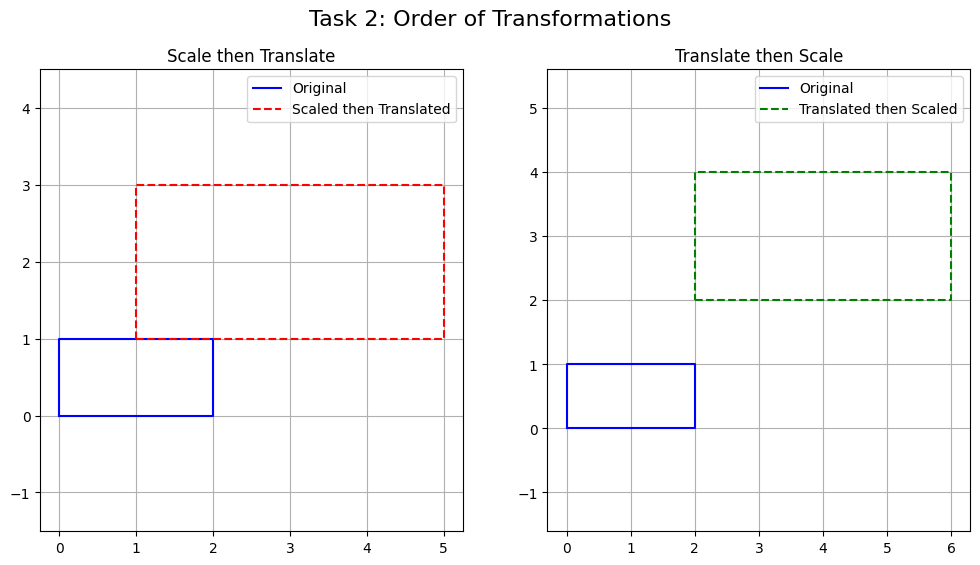

In [12]:
# --- Task 2: Order Matters
rectangle = np.array([[0, 0, 1],
                      [2, 0, 1],
                      [2, 1, 1],
                      [0, 1, 1],
                      [0, 0, 1]])

# Order 1: Scale then Translate
scaled_first = scale(rectangle, 2, 2)
result_1 = translate(scaled_first, 1, 1)

# Order 2: Translate then Scale
translated_first = translate(rectangle, 1, 1)
result_2 = scale(translated_first, 2, 2)

print("Vertices for 'Scale then Translate':")
print(np.round(result_1, 3))
print("\nVertices for 'Translate then Scale':")
print(np.round(result_2, 3))

# Plotting the results side-by-side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(rectangle[:, 0], rectangle[:, 1], 'b-', label='Original')
plt.plot(result_1[:, 0], result_1[:, 1], 'r--', label='Scaled then Translated')
plt.title("Scale then Translate")
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.plot(rectangle[:, 0], rectangle[:, 1], 'b-', label='Original')
plt.plot(result_2[:, 0], result_2[:, 1], 'g--', label='Translated then Scaled')
plt.title("Translate then Scale")
plt.legend()
plt.grid(True)
plt.axis('equal')

plt.suptitle("Task 2: Order of Transformations", fontsize=16)
plt.show()

Composed Transform Matrix:
[[ 1.732  1.     2.   ]
 [-1.     1.732 -1.   ]
 [ 0.     0.     1.   ]]

Final vertices after combined transform:
[[ 2.    -1.     1.   ]
 [ 3.732 -2.     1.   ]
 [ 3.866  0.232  1.   ]
 [ 2.    -1.     1.   ]]


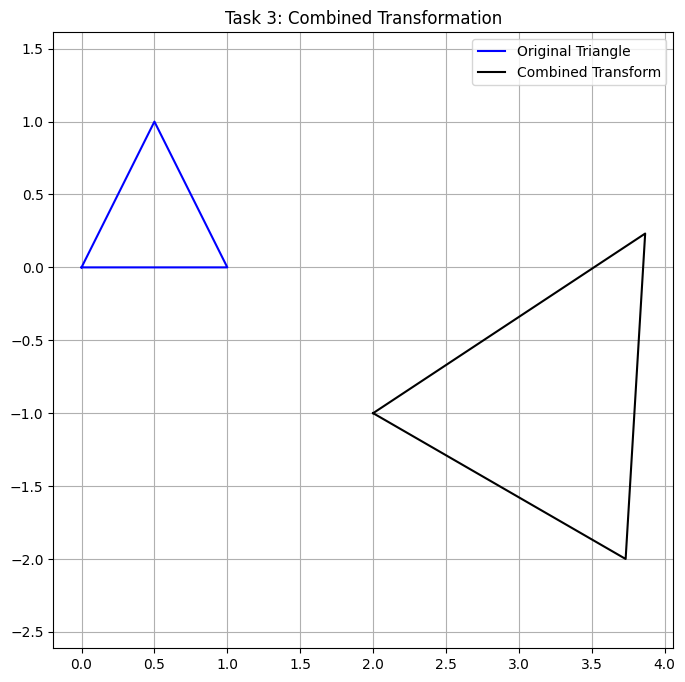

In [13]:
# --- Task 3: Combined Transform
from scipy.spatial.transform import Rotation as R_sci

# Define the individual transformation matrices
T_matrix = np.array([[1, 0, 2],
                     [0, 1, -1],
                     [0, 0, 1]])

S_matrix = np.array([[2, 0, 0],
                     [0, 2, 0],
                     [0, 0, 1]])

rad = np.radians(-30)
R_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                     [np.sin(rad), np.cos(rad), 0],
                     [0, 0, 1]])

# Compose the single transformation matrix (right to left order of application)
M_combined = T_matrix @ R_matrix @ S_matrix

print("Composed Transform Matrix:")
print(np.round(M_combined, 3))

# Apply the combined transform to the triangle
triangle = np.array([[0, 0, 1],
                     [1, 0, 1],
                     [0.5, 1, 1],
                     [0, 0, 1]])

transformed_triangle = (M_combined @ triangle.T).T

print("\nFinal vertices after combined transform:")
print(np.round(transformed_triangle, 3))

# Plotting the result
plt.figure(figsize=(8, 8))
plt.plot(triangle[:, 0], triangle[:, 1], 'b-', label='Original Triangle')
plt.plot(transformed_triangle[:, 0], transformed_triangle[:, 1], 'k-', label='Combined Transform')
plt.title("Task 3: Combined Transformation")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Original square vertices:
[[0 0 1]
 [1 0 1]
 [1 1 1]
 [0 1 1]
 [0 0 1]]

Vertices after x-shear (factor=0.5):
[[0.  0.  1. ]
 [1.  0.  1. ]
 [1.5 1.  1. ]
 [0.5 1.  1. ]
 [0.  0.  1. ]]


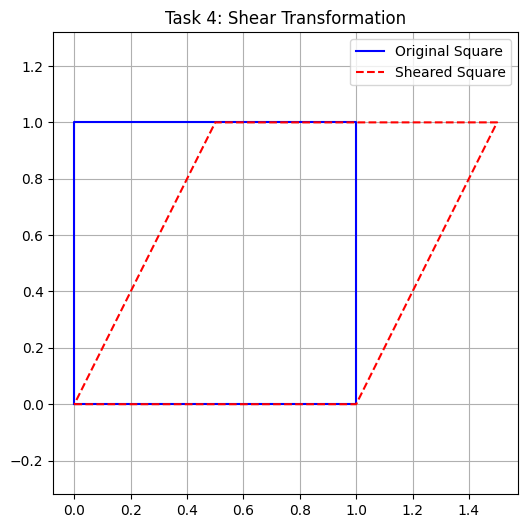

In [17]:
# --- Task 4 (Extra): Shear Transformation
square = np.array([[0, 0, 1],
                   [1, 0, 1],
                   [1, 1, 1],
                   [0, 1, 1],
                   [0, 0, 1]])

# Apply shear with a shear factor of 0.5 along the x-axis
sheared_square = shear_x(square, 0.5)

print("Original square vertices:")
print(square)
print("\nVertices after x-shear (factor=0.5):")
print(np.round(sheared_square, 3))

# Plotting the result
plt.figure(figsize=(6, 6))
plt.plot(square[:, 0], square[:, 1], 'b-', label='Original Square')
plt.plot(sheared_square[:, 0], sheared_square[:, 1], 'r--', label='Sheared Square')
plt.title("Task 4: Shear Transformation")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

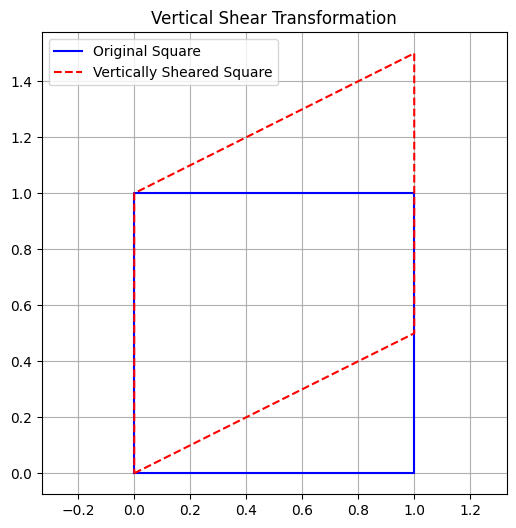

In [15]:
def shear_y(points, shy):
    """Shearing of points along y-axis by shy"""
    SHy = np.array([[1, 0, 0],
                    [shy, 1, 0],
                    [0, 0, 1]])
    return (SHy @ points.T).T

# To use it, you would call the function on your shape:
sheared_square_y = shear_y(square, 0.5)

# Then you can plot the result:
plt.figure(figsize=(6, 6))
plt.plot(square[:, 0], square[:, 1], 'b-', label='Original Square')
plt.plot(sheared_square_y[:, 0], sheared_square_y[:, 1], 'r--', label='Vertically Sheared Square')
plt.title("Vertical Shear Transformation")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
